### KNN Classifier for Email Spam Detection Using NLP

In [1]:
import numpy as np
import string
import pandas as pd
from pandas import DataFrame
import nltk
import csv
import random

In [4]:
dataset='textualMailsDataset.csv'

In [5]:
df=pd.read_csv(dataset)
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [6]:
#Preprocessing the data by removing stop words and punctuations
from nltk.corpus import stopwords
stopwords_set=set(stopwords.words('english'))
stopwords_set.remove('won')

def preProcess(dataset):
    with open(dataset,'r') as spam:
        data=list(csv.reader(spam))
        data=data[1:] #each mail is list of 2 strings.
        
        #making the data as list of a list with non punct words and list with label [['..','..',...],1/0]
        punct=set(string.punctuation)
        punct.remove('$')
        for email in range(len(data)):
            templist=[char for char in data[email][0] if char not in punct]
            templabel=int(data[email][1])
            data[email][0]=''.join(templist)
            data[email][1]=templabel
        
        #removing stop words and numbers from mails
        for email in range(len(data)):
            tempmail=[]
            for word in data[email][0].split():
                if(word not in stopwords_set and not word.isnumeric()):
                    tempmail.append(word)
            data[email][0]=' '.join(tempmail)
                    
#         for i in range(100):
#             print(data[i])
        return data

data = preProcess(dataset)
for i in range(10):
    print(data[i])

['Subject naturally irresistible corporate identity lt really hard recollect company market full suqgestions information isoverwhelminq good catchy logo stylish statlonery outstanding website make task much easier promise havinq ordered iogo company automaticaily become world ieader isguite ciear without good products effective business organization practicable aim hotat nowadays market promise marketing efforts become much effective list clear benefits creativeness hand made original logos specially done reflect distinctive company image convenience logo stationery provided formats easy use content management system letsyou change website content even structure promptness see logo drafts within three business days affordability marketing break make gaps budget satisfaction guaranteed provide unlimited amount changes extra fees surethat love result collaboration look portfolio interested', 1]
['Subject stock trading gunslinger fanny merrill muzo colza attainder penultimate like esmark 

In [7]:

from nltk.stem import PorterStemmer 
from spellchecker import SpellChecker

spell = SpellChecker()
ps = PorterStemmer() 

def performStemming(data):
    for i in range(len(data)):
        email=[]
        for j in data[i][0].split():
            word=ps.stem(j)
#             if(word!=j):
#                 word=spell.correction(word)
            email.append(word)
        data[i][0]=' '.join(email)
    return data
    
# data=preProcess(dataset)
# performStemming(data)
# data

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# def train_test_split(data,splitRatio):
#     trainSet=[]
#     testSet=[]
#     for i in data:
#         if(random.random()<splitRatio):
#             trainSet.append(i)
#         else:
#             testSet.append(i)
#     random.shuffle(trainSet)
#     random.shuffle(testSet)
#     return [trainSet,testSet]

def splitinto_labels_attributes(trainset,testset):
    #return [trainset[:-1],trainset[-1],testset[:-1],testset[-1]]
    x_train=[]
    x_test=[]
    y_train=[]
    y_test=[]
    for i in trainset:
        x_train.append(i[:-1])
        y_train.append(i[-1])
    for i in testset:
        x_test.append(i[:-1])
        y_test.append(i[-1])
    return [x_train,y_train,x_test,y_test]

# def make_count_vectorizer(data,distinct_words):
#     bag=[]
#     for email in range(len(data)):
#         temp=[0 for i in range(len(distinct_words))]
#         i=0
#         for word in distinct_words:
#             if(word in data[email][0]):
#                 temp[i]+=1
#             i+=1
#         bag.append(temp)
#     return bag

# def distinctWords(data):
#     distinct_words=set()
#     for i in range(len(data)):
#         for j in range(len(data[i][0])):
#             if (data[i][0][j]) not in distinct_words:
#                 distinct_words.add(data[i][0][j])
#     return distinct_words

trainSet=[]
testSet=[]
data=preProcess(dataset)

##############################
#######Adding stemming########
##############################

#data = performStemming(data)

# distinct_words=distinctWords(data)

# bagOfWords=make_count_vectorizer(data,distinct_words)

bow=CountVectorizer(data).fit_transform(df['text'])

#x_train,y_train,x_test,y_test=splitinto_labels_attributes(trainSet,testSet)
x_train,x_test,y_train,y_test=train_test_split(bow,df['spam'],test_size=0.20,random_state=42)
type(bow)
#bow.shape  (5728, 37303)
#print(x_train)

scipy.sparse.csr.csr_matrix

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

knn_classifier=KNeighborsClassifier(n_neighbors=5).fit(x_train,y_train)
pred=knn_classifier.predict(x_test)
print(classification_report(y_test,pred))

print('confusion matrix :\n',confusion_matrix(y_test,pred))
print('Accuracy :\n',accuracy_score(y_test,pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       856
           1       0.93      0.69      0.79       290

    accuracy                           0.91      1146
   macro avg       0.91      0.84      0.87      1146
weighted avg       0.91      0.91      0.90      1146

confusion matrix :
 [[840  16]
 [ 90 200]]
Accuracy :
 0.9075043630017452


In [10]:
n_values_var=[3,5,7,9,11,13,17,19,23,29,31,37,41,43,47,53,59,61,67,71,73,79,83,89,97,101,103,107,109,113,127,131,123,137,139,149,151,157,163]
knn_accuracy_var=[]
for i in n_values_var:
    knn_classifier=KNeighborsClassifier(n_neighbors=i).fit(x_train,y_train)
    pred=knn_classifier.predict(x_test)
    knn_accuracy_var.append(accuracy_score(y_test,pred))
print(knn_accuracy_var)

[0.9223385689354275, 0.9075043630017452, 0.9031413612565445, 0.900523560209424, 0.8883071553228621, 0.8848167539267016, 0.8787085514834206, 0.8717277486910995, 0.8656195462478184, 0.8630017452006981, 0.8621291448516579, 0.8612565445026178, 0.8621291448516579, 0.8630017452006981, 0.8603839441535777, 0.8595113438045375, 0.8542757417102966, 0.8534031413612565, 0.8525305410122164, 0.8507853403141361, 0.8507853403141361, 0.8472949389179756, 0.8464223385689355, 0.8368237347294939, 0.8342059336823735, 0.8324607329842932, 0.8307155322862129, 0.8280977312390925, 0.8289703315881326, 0.8298429319371727, 0.8298429319371727, 0.8289703315881326, 0.8298429319371727, 0.8263525305410122, 0.8263525305410122, 0.8263525305410122, 0.8254799301919721, 0.8263525305410122, 0.8237347294938918]


In [11]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
%matplotlib inline

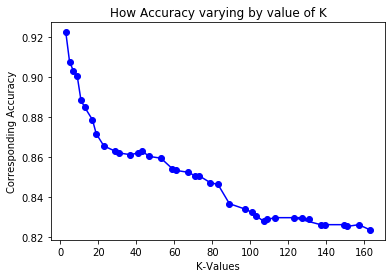

In [13]:
plt.plot(n_values_var,knn_accuracy_var,color='blue',marker='o')
plt.xlabel('K-Values')
plt.ylabel('Corresponding Accuracy')
plt.title('How Accuracy varying by value of K')
plt.show()

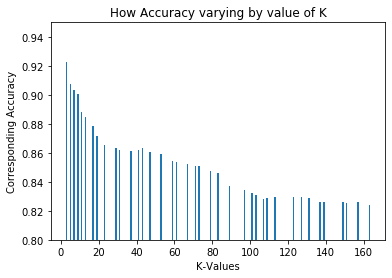

In [14]:
plt.bar(n_values_var,knn_accuracy_var)
plt.xlabel('K-Values')
plt.ylabel('Corresponding Accuracy')
plt.ylim(0.8,0.95)
plt.title('How Accuracy varying by value of K')
plt.show()